In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
import matplotlib

In [2]:
matplotlib.rcParams.update({'font.size': 14})

Given the function $f(x) = \sin(e^{10x})$ let's approximate $f'$ and $f''$ at a point $z$. 

In [3]:
def foo(x):
    #return np.sin(np.exp(3*x))
    return np.sin(10*x)
def d_foo(x):
    return 10*np.cos(10*x)
def d2_foo(x):
    #return np.cos(np.exp(3*x)) * np.exp(3*x) * 3
    return -100*np.sin(10*x)

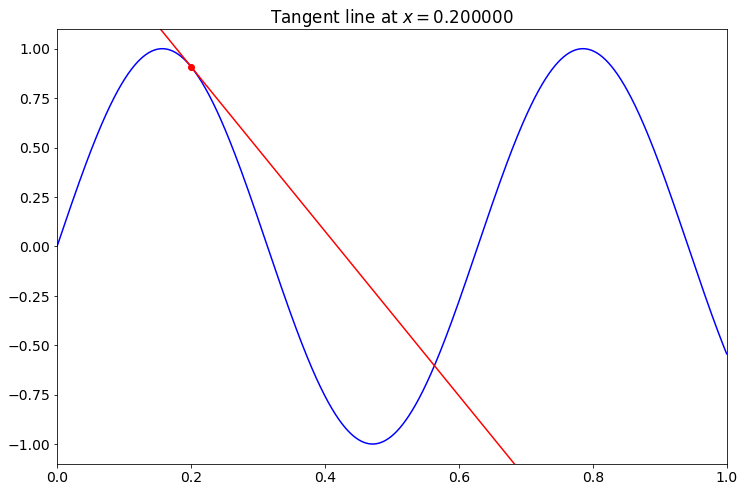

In [4]:
z = .2 # calculate derivative at this point

plt.figure(figsize=(12,8))
zs = np.linspace(0,1,1000)
plt.plot(zs, foo(zs), 'b-')

plt.plot([z-5, z+5], [foo(z)-d_foo(z)*5, foo(z)+d_foo(z)*5], 'r-')
plt.plot(z, foo(z), 'ro')

plt.ylim((-1.1,1.1))
plt.xlim((0,1))
plt.title('Tangent line at $x=%f$'%z)
plt.show()

In [5]:
def rbf(r, eps=1):
    return np.exp(-(eps*r)**2)
def d_rbf_div_r(r, eps=1):
    return -2*eps**2*np.exp(-(eps*r)**2)
def d2_rbf(r, eps=1):
    return 2*eps**2*(2*eps**2*r**2 - 1)*np.exp(-eps**2*r**2)

In [6]:
N = 50
epsilon = 14

xs = np.linspace(0,1, N)
# we must ensure that we use the point z
# for simplicity let's just replace the closest point with it
index = np.argmin(np.abs(xs-z))
print('Replacing x=%.2f with x=%.2f' % (xs[index], z))
xs[index] = z

# approximate first derivative
A = rbf(np.abs(np.subtract.outer(xs,xs)), epsilon)
print('cond(A) = %g' % la.cond(A))
Lphis = d_rbf_div_r(np.abs(z-xs),epsilon) * (z-xs)
ws = la.solve(A, Lphis)

approx = np.dot(ws, foo(xs))
exact = d_foo(z)
print('First derivative error: \t%g' % (np.abs(approx-exact)/abs(exact)) )

# approximate second derivative
Lphis = d2_rbf(np.abs(z-xs),epsilon)
ws = la.solve(A, Lphis)

approx = np.dot(ws, foo(xs))
exact = d2_foo(z)
print('Seconed derivative error: \t%g' % (np.abs(approx-exact)/abs(exact)) )

Replacing x=0.20 with x=0.20
cond(A) = 1.82807e+12
First derivative error: 	2.38166e-06
Seconed derivative error: 	4.15156e-06
